# DESAFIO 6: Descarga de datos desde APIs públicas
Recolección de datos, hasta el 7 de marzo de 2021, sobre COVID en 50 estados de EE.UU., el Distrito de Columbia y 5 territorios de EE.UU, extraidos de "The COVID Tracking Project"

In [35]:
import requests
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [24]:
url = "https://api.covidtracking.com/v1/us/daily.json"
df = requests.get(url)
print(df)

<Response [200]>


In [25]:
# Transformar a json
json_data = json.loads(df.text)
json_data

[{'date': 20210307,
  'states': 56,
  'positive': 28756489,
  'negative': 74582825,
  'pending': 11808,
  'hospitalizedCurrently': 40199,
  'hospitalizedCumulative': 776361,
  'inIcuCurrently': 8134,
  'inIcuCumulative': 45475,
  'onVentilatorCurrently': 2802,
  'onVentilatorCumulative': 4281,
  'dateChecked': '2021-03-07T24:00:00Z',
  'death': 515151,
  'hospitalized': 776361,
  'totalTestResults': 363825123,
  'lastModified': '2021-03-07T24:00:00Z',
  'recovered': None,
  'total': 0,
  'posNeg': 0,
  'deathIncrease': 842,
  'hospitalizedIncrease': 726,
  'negativeIncrease': 131835,
  'positiveIncrease': 41835,
  'totalTestResultsIncrease': 1170059,
  'hash': 'a80d0063822e251249fd9a44730c49cb23defd83'},
 {'date': 20210306,
  'states': 56,
  'positive': 28714654,
  'negative': 74450990,
  'pending': 11783,
  'hospitalizedCurrently': 41401,
  'hospitalizedCumulative': 775635,
  'inIcuCurrently': 8409,
  'inIcuCumulative': 45453,
  'onVentilatorCurrently': 2811,
  'onVentilatorCumulative

## Exploración de datos

In [26]:
# Crear dataframe
data = pd.DataFrame.from_dict(json_data)
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [27]:
data.shape

(420, 25)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [29]:
data.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,totalTestResults,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,392.000000,369.000000,4.200000e+02,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,187210.668367,310817.140921,1.073369e+08,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,142331.657380,235557.870159,1.129172e+08,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,0.000000,4.000000,0.000000e+00,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,86911.750000,123250.000000,5.888598e+06,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,169118.500000,280138.000000,6.839699e+07,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,258912.250000,481309.000000,1.854937e+08,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,515151.000000,776361.000000,3.638251e+08,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


In [33]:
# Convertir DATE a formato fecha
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [34]:
data.isnull().sum()


date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64

## Visualización

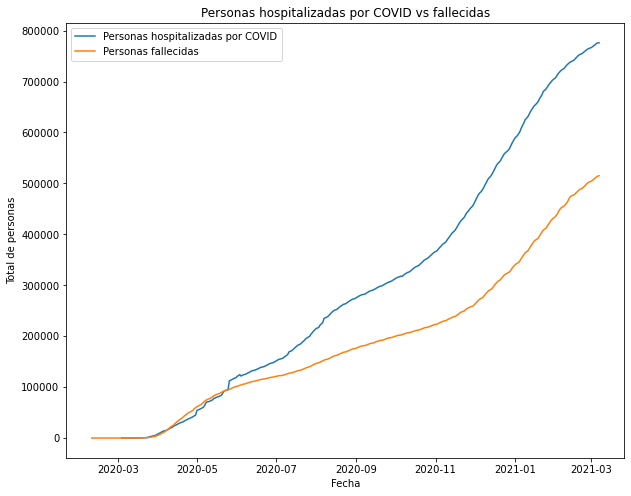

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data['date'], data['hospitalized'], label='Personas hospitalizadas por COVID')
ax.plot(data['date'], data['death'], label='Personas fallecidas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Total de personas')
ax.set_title('Personas hospitalizadas por COVID vs fallecidas')
ax.legend()
plt.show()


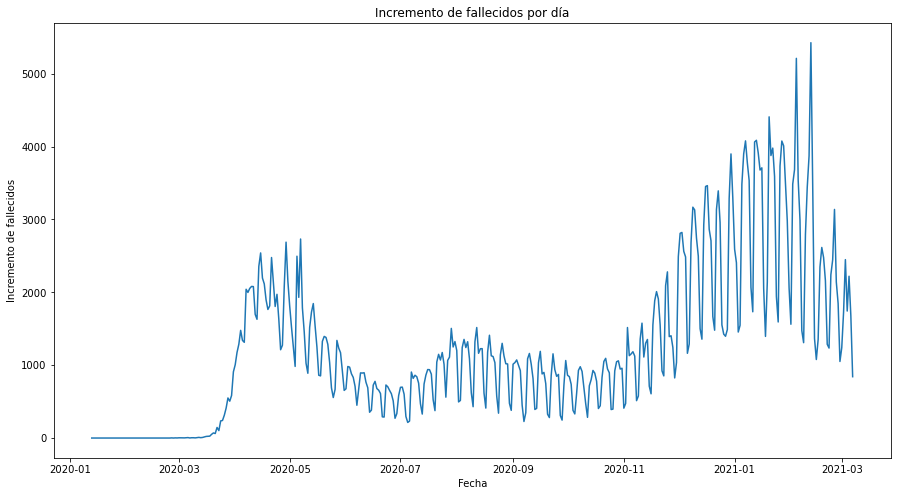

In [53]:
fix, ax = plt.subplots(figsize=(15, 8))
ax.plot(data['date'], data['deathIncrease'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Incremento de fallecidos')
ax.set_title('Incremento de fallecidos por día')
plt.show()